<a href="https://colab.research.google.com/github/RaneemGhalion/Dimond/blob/main/dimonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimonds

https://www.kaggle.com/datasets/shivam2503/diamonds

Context
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

Content
price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)


In [51]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
df=pd.read_csv("/content/drive/MyDrive/Ai/Dimond/Dimond/diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
# Let's explore the data

# [53940 rows x 11 columns]
# no missing values
# 3 objects need to be encoded
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [11]:
# How many colours do we have ?
df["color"].unique()  #we have 7 different colours

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [12]:
# How many cuts do we have ?
df["cut"].unique()  #we have 5 different cuts

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

<Axes: xlabel='color', ylabel='price'>

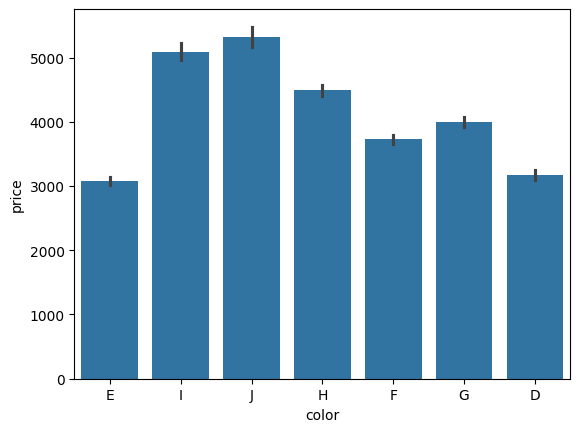

In [13]:
# let's see the relation between the color and the price
# sns.plot(x=)
sns.barplot(x='color', y='price', data=df)


<Axes: xlabel='cut', ylabel='price'>

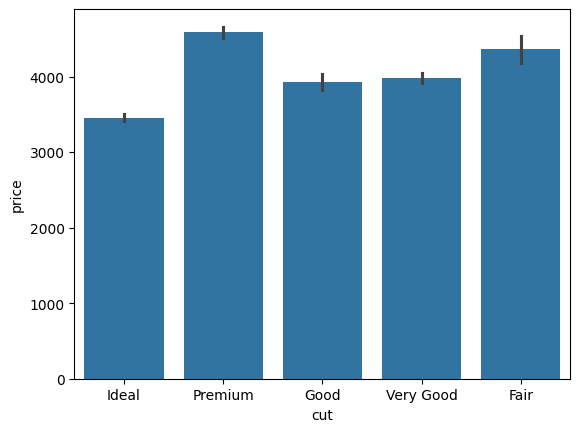

In [14]:
# let's see the relation between cuts and price
sns.barplot(x='cut', y='price', data=df)


In [15]:
# create new column the volume of the dimoind

df["volume"]=df["x"]*df["y"]*df["z"]
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [16]:
# sns.pairplot(df)

<Axes: xlabel='volume', ylabel='price'>

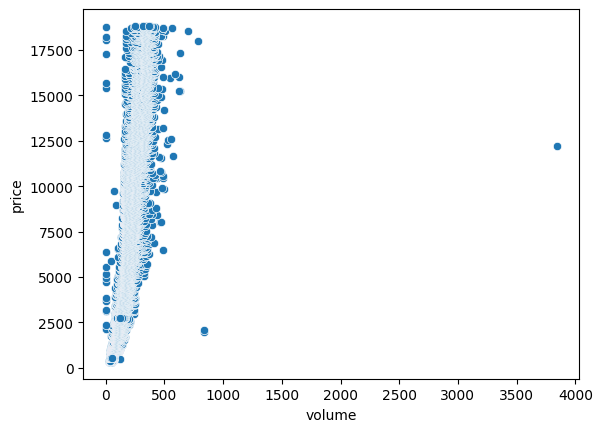

In [17]:
sns.scatterplot(x="volume",y="price",data=df)



In [18]:
# let's drop outliers

# z_scores = np.abs((df['price'] - df['column_name'].mean()) / df['column_name'].std())


In [19]:
# let's encode the objects
df_hot_encoded=pd.get_dummies(df)
df_hot_encoded.head()

,Unnamed: 0,carat,depth,table,price,x,y,z,volume,cut_Fair,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1,0.23,61.5,55.0,326,3.95,3.98,2.43,38.202030,0,...,0,0,0,0,0,1,0,0,0,0
1,2,0.21,59.8,61.0,326,3.89,3.84,2.31,34.505856,0,...,0,0,0,0,1,0,0,0,0,0
2,3,0.23,56.9,65.0,327,4.05,4.07,2.31,38.076885,0,...,0,0,0,0,0,0,1,0,0,0
3,4,0.29,62.4,58.0,334,4.20,4.23,2.63,46.724580,0,...,1,0,0,0,0,0,0,1,0,0
4,5,0.31,63.3,58.0,335,4.34,4.35,2.75,51.917250,0,...,0,1,0,0,0,1,0,0,0,0


In [20]:
X=df_hot_encoded.drop(["price"],axis=1)
X.head()

,Unnamed: 0,carat,depth,table,x,y,z,volume,cut_Fair,cut_Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1,0.23,61.5,55.0,3.95,3.98,2.43,38.202030,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,0.21,59.8,61.0,3.89,3.84,2.31,34.505856,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3,0.23,56.9,65.0,4.05,4.07,2.31,38.076885,0,1,...,0,0,0,0,0,0,1,0,0,0
3,4,0.29,62.4,58.0,4.20,4.23,2.63,46.724580,0,0,...,1,0,0,0,0,0,0,1,0,0
4,5,0.31,63.3,58.0,4.34,4.35,2.75,51.917250,0,1,...,0,1,0,0,0,1,0,0,0,0


In [21]:
y=df_hot_encoded["price"]
y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
random_seed = 42
np.random.seed(random_seed)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape,y_train.shape,X_test.shape

((43152, 28), (43152,), (10788, 28))

In [44]:
X_train.shape


(43152, 28)

In [58]:
tf.random.set_seed(42)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3,verbose=1)


In [59]:

model_1=tf.keras.Sequential([
  # tf.keras.layers.Flatten(input_shape=(43152, 28)),  # Flatten the input
    tf.keras.layers.Dense(100, activation='relu'),  # Use ReLU activation
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)])

model_1.compile(loss=tf.keras.losses.mae,metrics=["mae"] ,optimizer=tf.keras.optimizers.SGD(learning_rate=0.3))

history=model_1.fit(X_train,y_train,epochs=200,callbacks=[callback],verbose=1)
print("Stopped Epoch:", callback.stopped_epoch)


Epoch 1/200
1349/1349 [==============================] - 5s 3ms/step - loss: 21493426969825878474752.0000 - mae: 21493426969825878474752.0000
Epoch 2/200
1349/1349 [==============================] - 4s 3ms/step - loss: 3371.1709 - mae: 3371.1709
Epoch 3/200
1349/1349 [==============================] - 4s 3ms/step - loss: 3164.8242 - mae: 3164.8242
Epoch 4/200
1349/1349 [==============================] - 4s 3ms/step - loss: 3066.8398 - mae: 3066.8398
Epoch 5/200
1349/1349 [==============================] - 4s 3ms/step - loss: 3009.2402 - mae: 3009.2402
Epoch 6/200
1349/1349 [==============================] - 4s 3ms/step - loss: 2967.8765 - mae: 2967.8765
Epoch 7/200
1349/1349 [==============================] - 4s 3ms/step - loss: 2936.3293 - mae: 2936.3293
Epoch 8/200
1349/1349 [==============================] - 5s 3ms/step - loss: 2909.3025 - mae: 2909.3025
Epoch 9/200
1349/1349 [==============================] - 4s 3ms/step - loss: 2886.9270 - mae: 2886.9270
Epoch 10/200
1349/1349 [==

In [60]:
model_1.evaluate(X_test,y_test)

338/338 [==============================] - 1s 2ms/step - loss: 2790.4602 - mae: 2790.4602


[2790.460205078125, 2790.460205078125]

In [47]:
df["price"].mean()

3932.799721913237

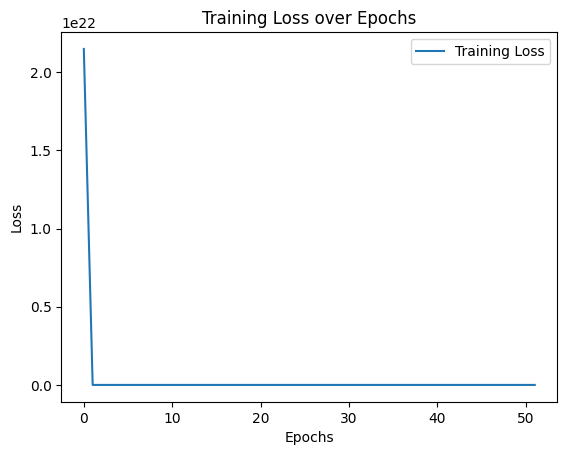

In [62]:
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Model 2 let's normalize the data


In [64]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [69]:
y=df["price"]
y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [77]:
df=pd.read_csv("/content/drive/MyDrive/Ai/Dimond/Dimond/diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [81]:
# create new column the volume of the dimoind

df["volume"]=df["x"]*df["y"]*df["z"]
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [85]:
X = df.drop(["price", "x", "y", "z","Unnamed: 0"], axis=1)
X

,carat,cut,color,clarity,depth,table,volume
0,0.23,Ideal,E,SI2,61.5,55.0,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,34.505856
2,0.23,Good,E,VS1,56.9,65.0,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,46.724580
4,0.31,Good,J,SI2,63.3,58.0,51.917250
...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,115.920000
53936,0.72,Good,D,SI1,63.1,55.0,118.110175
53937,0.70,Very Good,D,SI1,62.8,60.0,114.449728
53938,0.86,Premium,H,SI2,61.0,58.0,140.766120


In [98]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame

# Check if all specified columns in the column transformer are present in the DataFrame
numeric_cols = ["carat", "table", "volume"]
categorical_cols = ["cut", "clarity", "color"]

# assert all(col in df.columns for col in numeric_cols + categorical_cols), "Column not found in DataFrame"

ct = make_column_transformer(
    (MinMaxScaler(), numeric_cols),
    (OneHotEncoder(handle_unknown="ignore"), categorical_cols)
)

y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)
X_train_normal = X_train_normal.toarray()
X_test_normal = X_test_normal.toarray()


In [99]:
tf.random.set_seed(42)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3,verbose=1)

model_2=tf.keras.Sequential([
  # tf.keras.layers.Flatten(input_shape=(43152, 28)),  # Flatten the input
    tf.keras.layers.Dense(100, activation='relu'),  # Use ReLU activation
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)])

model_2.compile(loss=tf.keras.losses.mae,metrics=["mae"] ,optimizer=tf.keras.optimizers.SGD(learning_rate=0.3))

history=model_2.fit(X_train_normal,y_train,epochs=200,callbacks=[callback],verbose=1)
print("Stopped Epoch:", callback.stopped_epoch)



Epoch 1/200
1349/1349 [==============================] - 4s 3ms/step - loss: 3749.2715 - mae: 3749.2715
Epoch 2/200
1349/1349 [==============================] - 5s 3ms/step - loss: 3369.6384 - mae: 3369.6384
Epoch 3/200
1349/1349 [==============================] - 4s 3ms/step - loss: 3164.1501 - mae: 3164.1501
Epoch 4/200
1349/1349 [==============================] - 4s 3ms/step - loss: 3066.4832 - mae: 3066.4832
Epoch 5/200
1349/1349 [==============================] - 5s 3ms/step - loss: 3009.0042 - mae: 3009.0042
Epoch 6/200
1349/1349 [==============================] - 4s 3ms/step - loss: 2967.6853 - mae: 2967.6853
Epoch 7/200
1349/1349 [==============================] - 4s 3ms/step - loss: 2936.1697 - mae: 2936.1697
Epoch 8/200
1349/1349 [==============================] - 4s 3ms/step - loss: 2909.1533 - mae: 2909.1533
Epoch 9/200
1349/1349 [==============================] - 4s 3ms/step - loss: 2886.8076 - mae: 2886.8076
Epoch 10/200
1349/1349 [==============================] - 4s 3ms

In [102]:
model_1.evaluate(X_test_normal,y_test)

338/338 [==============================] - 1s 2ms/step - loss: 2790.4602 - mae: 2790.4602


[2790.460205078125, 2790.460205078125]

The model did not show any improvement after normalziation

# Let's use random forest isntead of neural network
